Predicting the tumors as malignant or benign using RF classifier by applying CV techniques 

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import pandas as pd
import numpy as np
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv("breast_cancer.csv")

In [4]:
data.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


In [6]:
data = data.drop(['Unnamed: 0', 'id number'], axis=1)

In [8]:
y = data.pop('malignant')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

# Grid Search

In [24]:
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [3,5,7,9]

rfc = RandomForestClassifier(n_jobs=1)
estimator = GridSearchCV(rfc, dict(n_estimators=n_estimators, 
                                  max_features=max_features, 
                                  min_samples_split=min_samples_split), cv=None, n_jobs=-1)

In [25]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [300, 400, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [26]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [27]:
best_rfc = estimator.best_estimator_

### Accuracy

In [28]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print("Accuracy: ", accuracy)

Accuracy:  0.964285714286


In [31]:
y_hat = best_rfc.predict(X_test)

In [32]:
y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0])

In [33]:
y_test

158    0
499    0
396    0
155    1
321    0
212    0
234    0
289    1
300    1
356    1
672    0
328    1
199    0
78     0
598    0
569    1
446    0
506    1
626    1
603    1
360    1
338    0
668    1
290    0
284    1
331    0
477    0
54     1
248    0
223    1
      ..
259    0
422    0
6      0
101    1
542    0
299    1
395    0
501    0
318    0
145    0
486    0
353    1
208    0
695    0
361    1
86     1
664    0
481    0
633    1
41     1
108    0
690    0
56     1
424    0
514    1
24     0
218    1
431    0
281    0
110    0
Name: malignant, dtype: int64

In [34]:
correct = 0
total = y_test.shape[0]

for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct += 1
        
print(correct/ float(total))


0.9642857142857143


In [29]:
print(classification_report(y_test, best_rfc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97        95
          1       0.95      0.93      0.94        45

avg / total       0.96      0.96      0.96       140



#### Precision
95% of predicted as malignant are malignant and 5% of predicted as malignant are benign

#### Recall
93% are actually malignant out of all predicted tumors as malignant 

In [30]:
print(confusion_matrix(y_test, best_rfc.predict(X_test)))

[[93  2]
 [ 3 42]]


$\left[ \begin{array}{cccc}
{TrueNegative} & {FalsePositive} \\
{FalseNegative} & {TruePositive} \\ \end{array} \right]$
 
 
 
- Precision = TP / TP+FP 
           = 42 / 42+2 
           = 0.954545  
- Recall = TP / TP+FN 
        = 42 / 42+3 
        = 0.933333

### Area Under the Curve (AUC)

In [36]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print("AUC Score: ", roc)

AUC Score:  0.995789473684


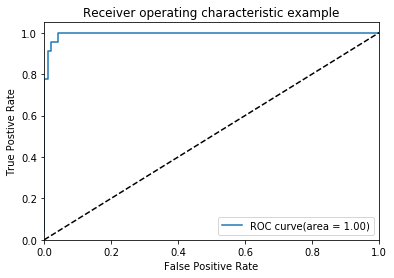

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve(area = %0.2f)' %roc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()


### K-Fold Cross Validation

In [49]:
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [50]:
scores

array([ 0.91549296,  0.97142857,  0.97142857,  0.91428571,  0.98571429,
        0.98571429,  0.97142857,  0.98571429,  0.98550725,  1.        ])

In [66]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci = 2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print("K-Fold CV Score is %f +/- %f" %(mean_score, ci))
print("95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f" %(lower_bound, upper_bound))

K-Fold CV Score is 0.968671 +/- 0.020162
95 percent probability that if this experiment were repeated over and over the average score would be between 0.948509 and 0.988834


- Single Hold-out AUC has a very good score of *0.995789473684* when compared to K-Fold Cross Validation score which is between *0.948509* and *0.988834* 



- My model predicted the tumors as malignant with an Accuracy of *0.964285714286* and an AUC score of *0.995789473684* which seems to be overfitting. However, the Precision value of *0.954545* and the Recall value of *0.933333* will tell you the exact differences in the predictions and the classifications. 